In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [46]:
df = pd.read_csv('rainfall in india 1901-2015.csv')
df.head(5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [47]:
# checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [48]:
df.dropna(inplace=True)

In [49]:
df.replace(np.nan, 0)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [50]:
df.isnull().count()

SUBDIVISION    4090
YEAR           4090
JAN            4090
FEB            4090
MAR            4090
APR            4090
MAY            4090
JUN            4090
JUL            4090
AUG            4090
SEP            4090
OCT            4090
NOV            4090
DEC            4090
ANNUAL         4090
Jan-Feb        4090
Mar-May        4090
Jun-Sep        4090
Oct-Dec        4090
dtype: int64

In [51]:
# checking for sundivision receiving maximum rainfall
df[['SUBDIVISION','ANNUAL']].sort_values(by = 'ANNUAL',ascending = False).head(20)

,SUBDIVISION,ANNUAL
142,ARUNACHAL PRADESH,6331.1
132,ARUNACHAL PRADESH,6129.0
115,ARUNACHAL PRADESH,5691.4
3602,COASTAL KARNATAKA,5553.9
112,ARUNACHAL PRADESH,5486.3
122,ARUNACHAL PRADESH,5272.7
121,ARUNACHAL PRADESH,5253.2
149,ARUNACHAL PRADESH,5063.5
155,ARUNACHAL PRADESH,4959.3
143,ARUNACHAL PRADESH,4874.7


c:\users\berlin\.conda\envs\opencv-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ANNUAL', ylabel='Density'>

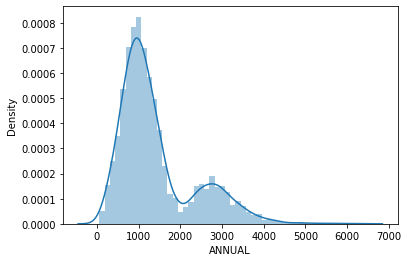

In [52]:
sns.distplot(df['ANNUAL'],hist = True)

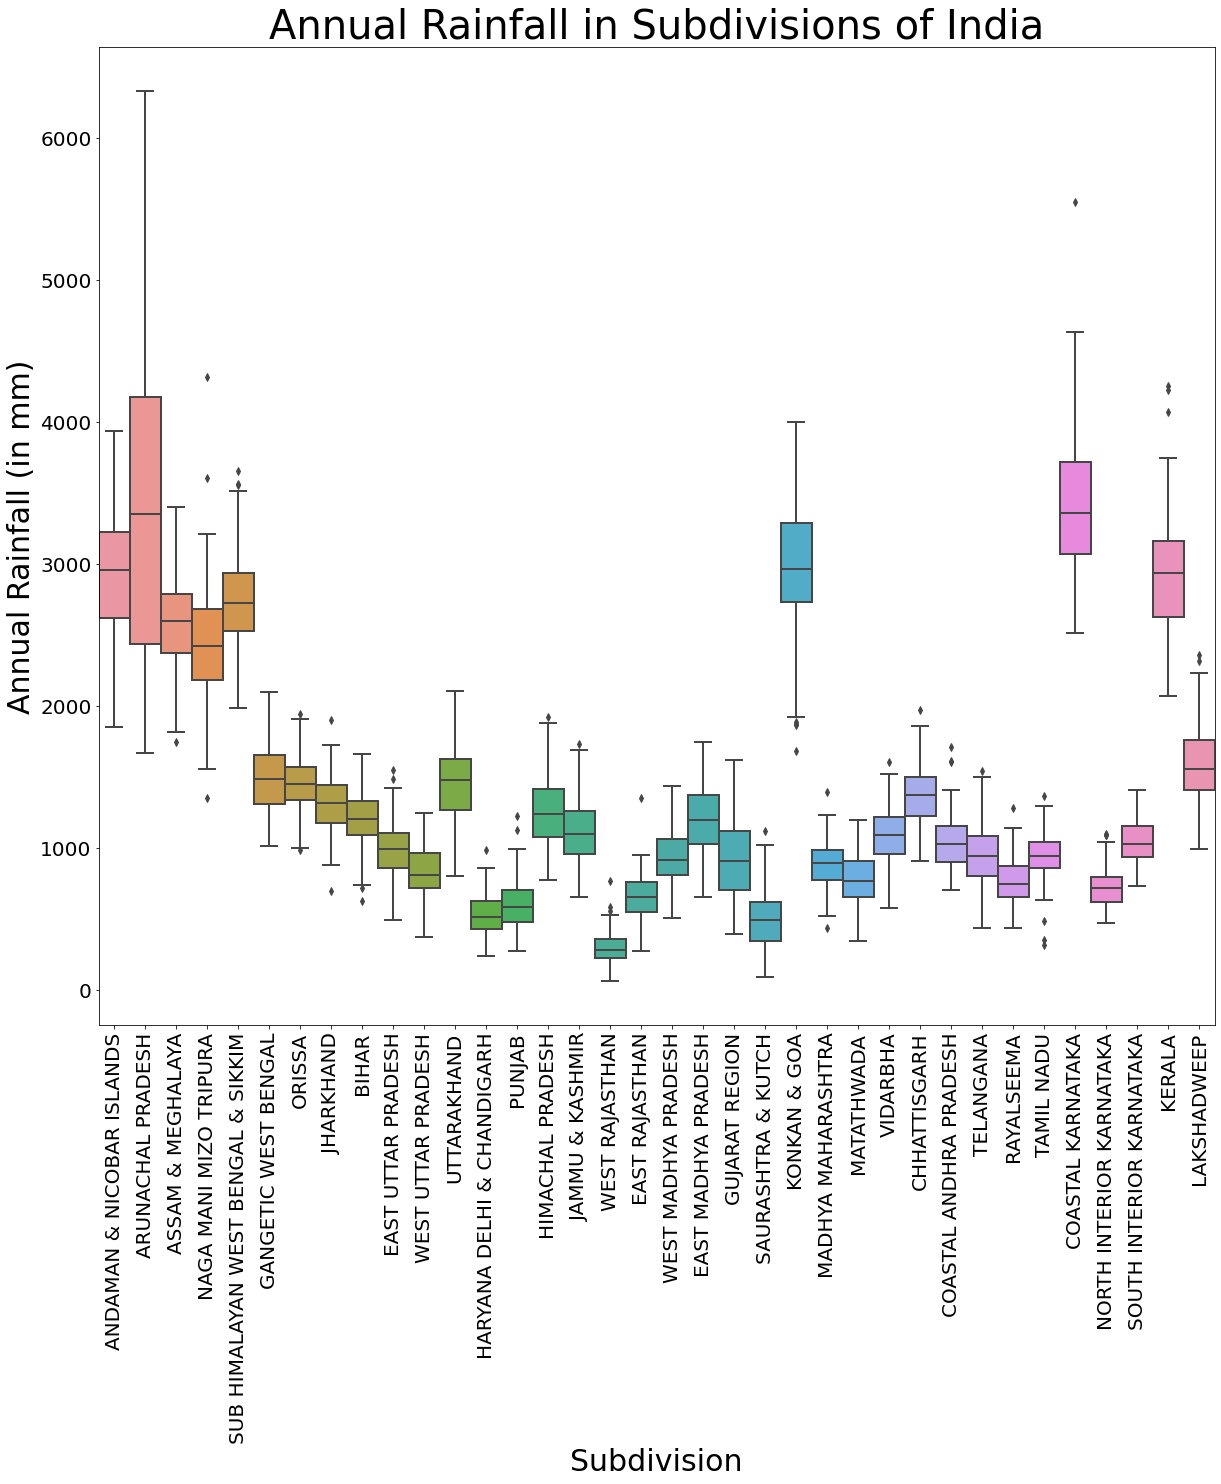

In [53]:
# Annual rainfall in subdivisions of India
plt.figure(figsize=(20,18))
ax = sns.boxplot(x="SUBDIVISION", y="ANNUAL", data=df, width=1, linewidth=2)
ax.set_xlabel('Subdivision',fontsize=30)
ax.set_ylabel('Annual Rainfall (in mm)',fontsize=30)
plt.title('Annual Rainfall in Subdivisions of India',fontsize=40)
ax.tick_params(axis='x', labelsize=20, rotation=90)
ax.tick_params(axis='y', labelsize=20, rotation=0)

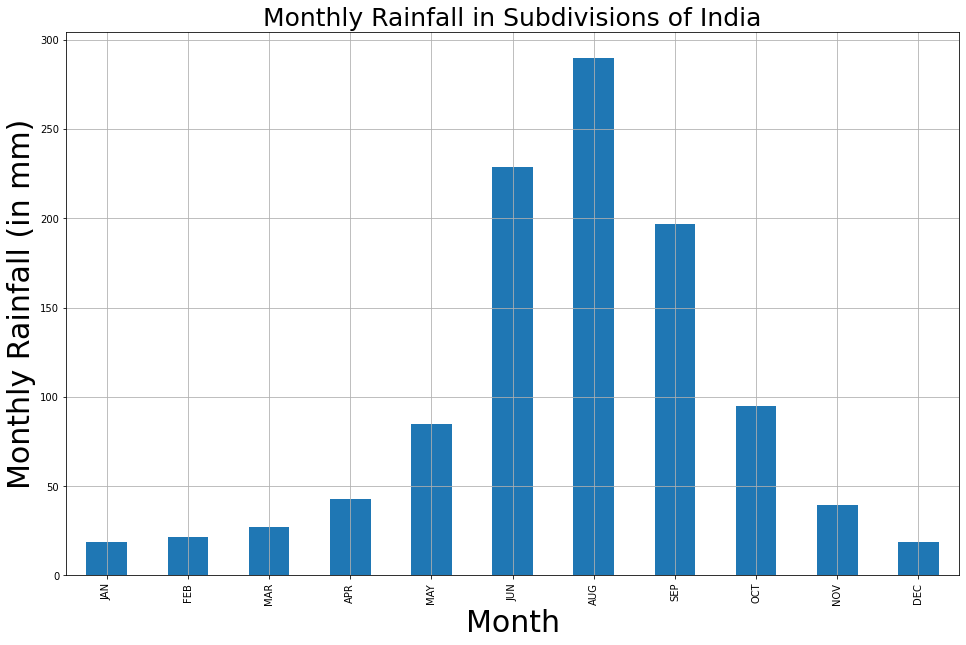

In [54]:
# Average monthly rainfall in India
ax=df[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5, linewidth=2, figsize=(16,10))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall (in mm)', fontsize=30)
plt.title('Monthly Rainfall in Subdivisions of India', fontsize=25)
ax.tick_params(labelsize=10)
plt.grid()

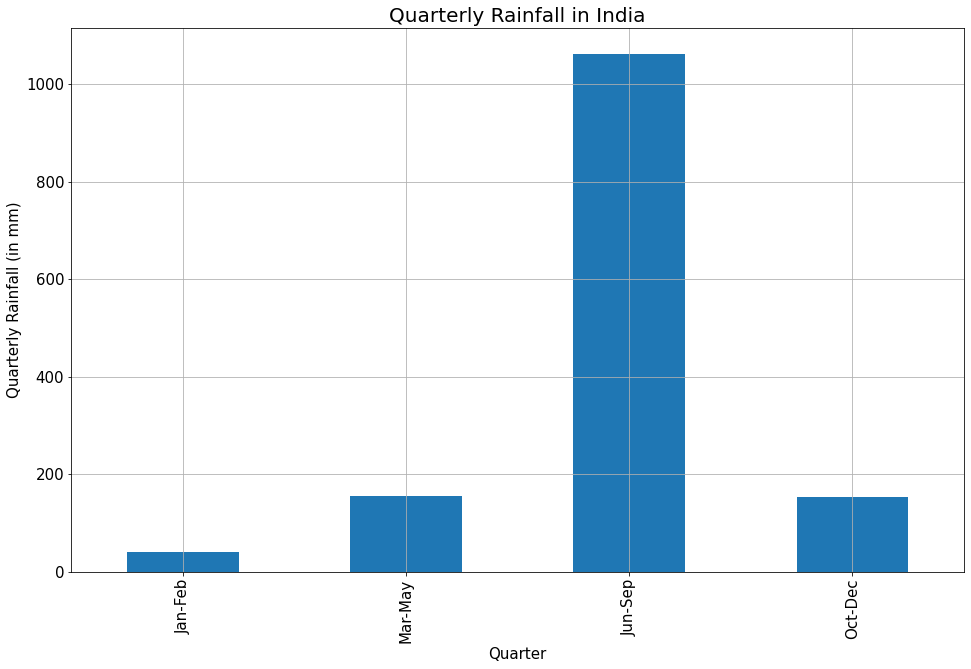

In [55]:
# Average monthly rainfall in India
ax = df[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].mean().plot.bar(width=0.5, linewidth=2, figsize=(16,10))
plt.xlabel('Quarter',fontsize=15)
plt.ylabel('Quarterly Rainfall (in mm)', fontsize=15)
plt.title('Quarterly Rainfall in India', fontsize=20)
ax.tick_params(labelsize=15)
plt.grid()

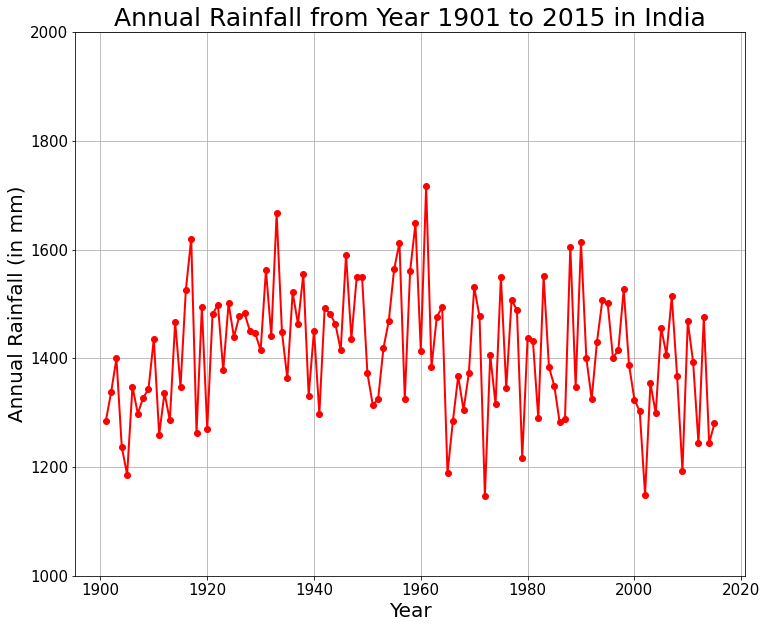

In [56]:
# Visualizing annual rainfall over the years(1901-2015) in India
ax = df.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(1000,2000),color='r',marker='o',linestyle='-',linewidth=2,figsize=(12,10));
plt.xlabel('Year',fontsize=20)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Annual Rainfall from Year 1901 to 2015 in India',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()

In [57]:
# Getting rainfall data for Rajasthan
Tamilnadu = df.loc[((df['SUBDIVISION'] == 'TAMIL NADU'))]
Tamilnadu.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3427,TAMIL NADU,1901,24.5,39.1,21.7,36.0,74.0,41.8,49.3,67.9,191.1,122.3,212.3,80.4,960.3,63.6,131.6,350.1,415.0
3428,TAMIL NADU,1902,67.2,9.8,25.1,21.9,84.7,39.3,55.1,113.8,98.6,282.2,174.9,165.8,1138.2,77.0,131.7,306.7,622.9
3429,TAMIL NADU,1903,19.3,7.8,1.7,18.2,128.5,58.5,72.6,115.0,210.4,128.1,200.5,203.2,1163.9,27.1,148.4,456.5,531.9
3430,TAMIL NADU,1904,35.2,0.1,0.7,19.5,121.9,34.9,89.0,40.4,85.7,163.2,23.6,49.1,663.1,35.3,142.1,249.9,235.8
3431,TAMIL NADU,1905,6.5,7.5,17.2,64.8,83.7,49.8,39.0,101.8,73.5,250.4,123.7,3.2,821.1,14.0,165.7,264.1,377.2


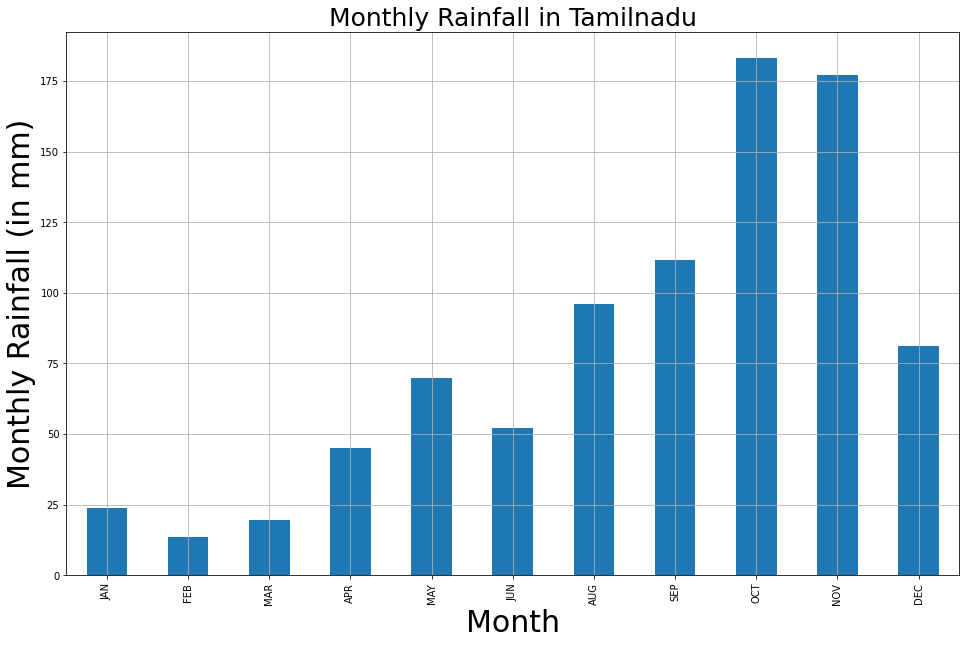

In [58]:
# Average monthly rainfall in Rajasthan
ax = Tamilnadu[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5, linewidth=2, figsize=(16,10))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall (in mm)', fontsize=30)
plt.title('Monthly Rainfall in Tamilnadu', fontsize=25)
ax.tick_params(labelsize=10)
plt.grid()

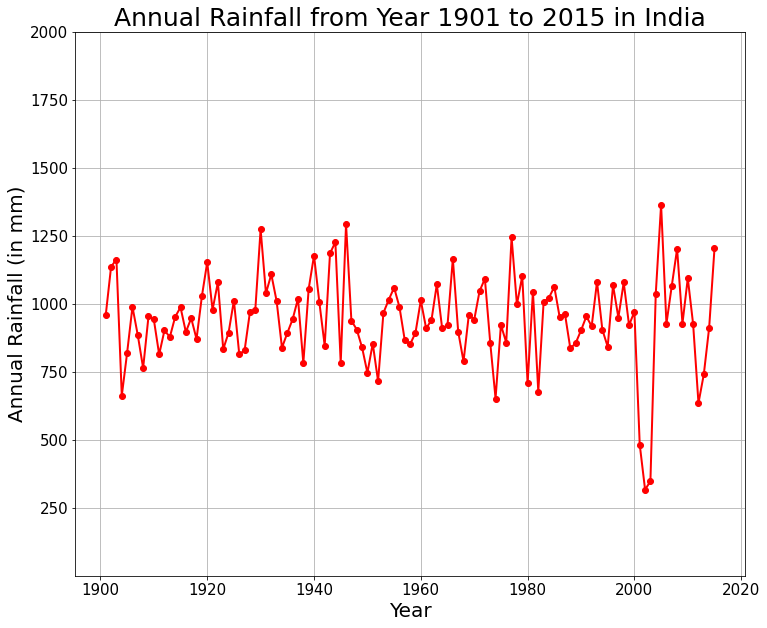

In [59]:
# Visualizing annual rainfall over the years(1901-2015) in India
ax = Tamilnadu.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(1,2000),color='r',marker='o',linestyle='-',linewidth=2,figsize=(12,10));
plt.xlabel('Year',fontsize=20)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Annual Rainfall from Year 1901 to 2015 in India',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
division_data = np.asarray(df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


(36810, 3)


# scaling

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler = MinMaxScaler()

In [81]:
X_train= scaler.fit_transform(X_train)

In [82]:
X_test = scaler.transform(X_test)

In [83]:
X_train.shape

(33129, 3)

In [88]:
X_test.shape
print(X_test)

[[1.15964110e-02 7.61808024e-04 4.21957000e-02]
 [1.86219739e-02 1.25656001e-01 1.58286778e-01]
 [4.23226680e-05 1.23158964e-02 9.31098696e-04]
 ...
 [0.00000000e+00 0.00000000e+00 2.44201794e-02]
 [1.73522939e-03 9.26866430e-03 9.47604537e-02]
 [1.52784832e-02 2.56475368e-02 5.65430845e-02]]


In [113]:
X_test[:,1].shape

(3681,)

# Linear regression

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [97]:
pred_test = model.predict(X_test)

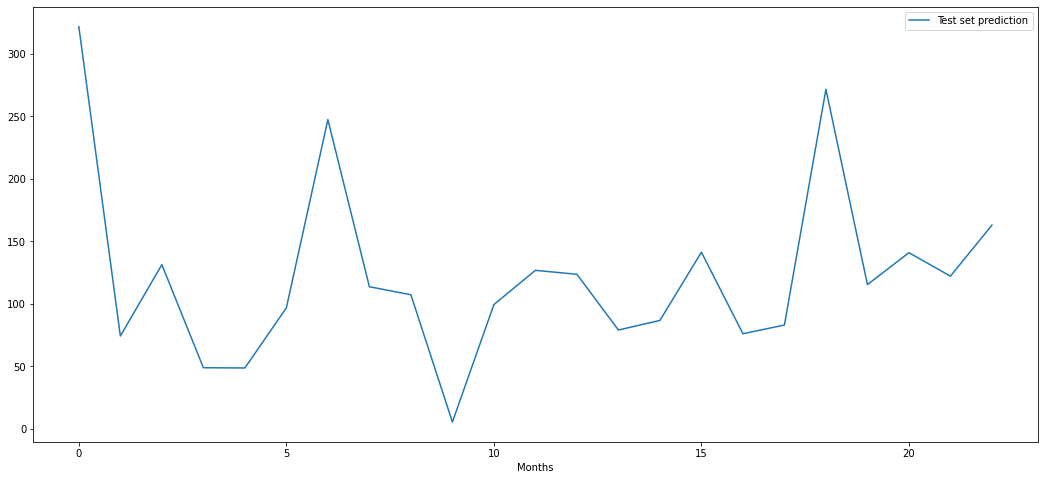

In [100]:

# Create the plot.
plt.figure(figsize = (18, 8))
plt.plot(pred_test[1:24], label = "Test set prediction")
plt.xlabel("Months")
plt.legend()
plt.show()

In [126]:
acc = regr.score(X_test, pred_test)
print("The accuracy of prediction for linear regression: ",acc*100)

The accuracy of prediction for linear regression:  64.5488965038637


# Support vector machine

In [103]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [104]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [117]:
pred_SVM = regr.predict(X_test)
print(pred_SVM.shape)


(3681,)
(3681, 3)


In [120]:
print(y_test.shape)

(3681,)


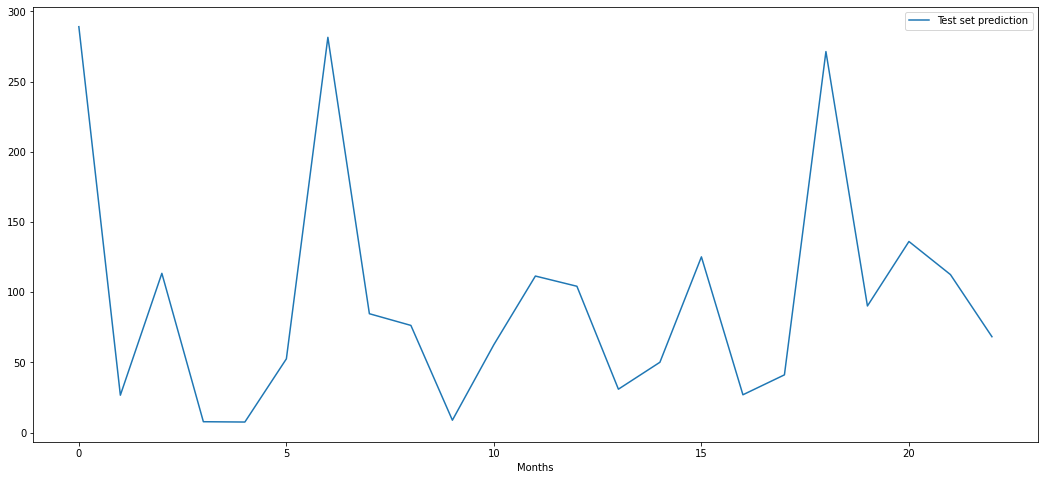

In [106]:
# Create the plot.
plt.figure(figsize = (18, 8))
plt.plot(pred_SVM[1:24], label = "Test set prediction")
plt.xlabel("Months")
plt.legend()
plt.show()

In [127]:
    # accuracy
    accu = regr.score(X_test, pred_SVM)
    print("The accuracy of prediction for Support vector machine: ",accu*100)

The accuracy of prediction for Support vector machine:  100.0


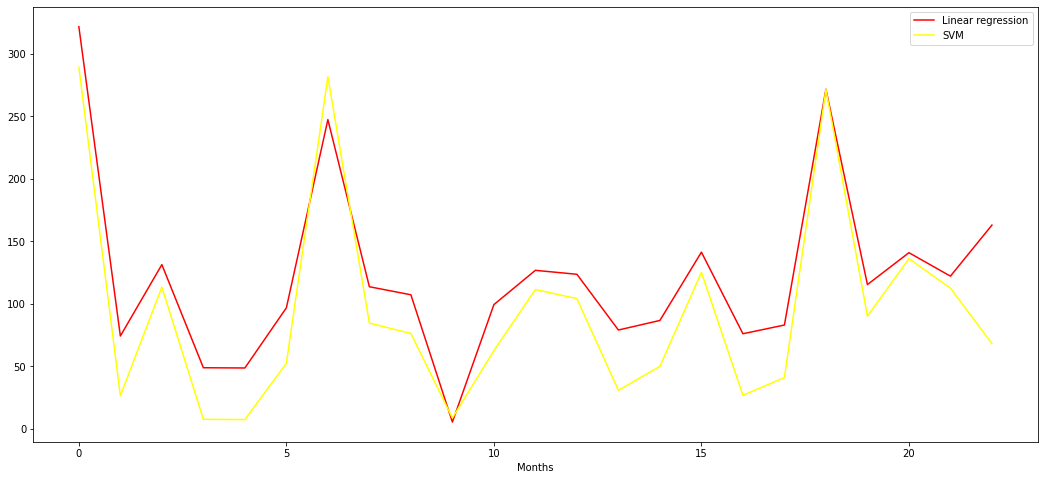

In [128]:
# comparision plot
plt.figure(figsize = (18, 8))
plt.plot(pred_test[1:24], label = "Linear regression",color ='red')
plt.plot(pred_SVM[1:24], label = "SVM",color = 'yellow')
plt.xlabel("Months")
plt.legend()
plt.show()